In [151]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
import cv2


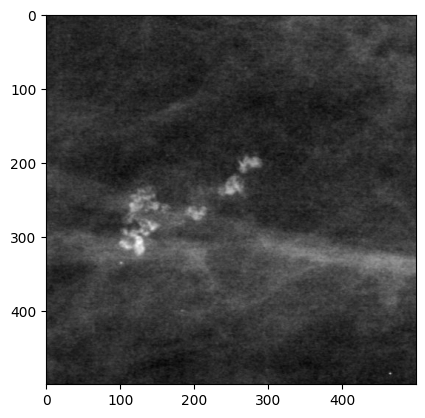

In [152]:
#plot the image BW

image = plt.imread('../data/raw/1-231.jpg')
image = image[2500:3000, 2000:2500]
plt.imshow(image, cmap='gray')
plt.show()

In [153]:
image.shape

(500, 500)

In [154]:
def hist(img):
    f_img = img_as_float(img) * 255.0
    f_img = np.clip(f_img, 0, 255).astype(np.uint8)

    # Flatten the image to get the pixel values as a 1D array
    pixels = f_img.flatten()

    # Create the histogram
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.hist(pixels, bins=256, range=(0, 255), color='blue', alpha=0.7)
    plt.title('Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    # Display the original image for comparison
    plt.subplot(1, 2, 2)
    plt.imshow(f_img, cmap='gray')
    plt.title('Original Malignant Micro-Calcification')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

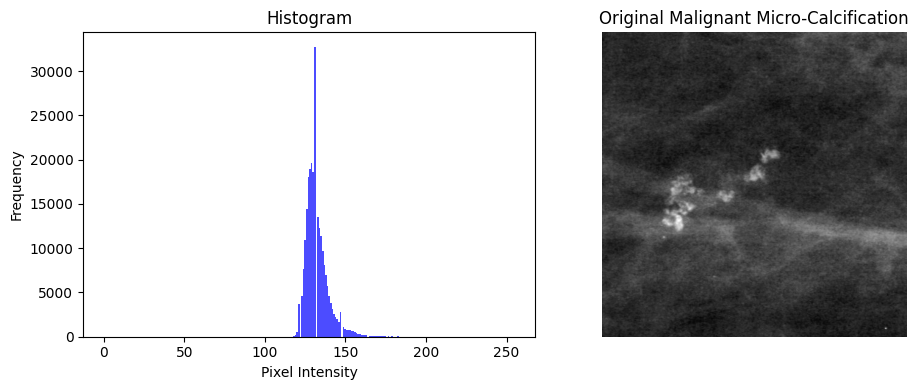

In [155]:
# Flatten the image to get the pixel values as a 1D array
# Convert the image to float and scale to [0, 255] range if it's not already 8-bit
f_img = img_as_float(image) * 255.0
f_img = np.clip(f_img, 0, 255).astype(np.uint8)

# Flatten the image to get the pixel values as a 1D array
pixels = f_img.flatten()

# Create the histogram
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(pixels, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title('Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Display the original image for comparison
plt.subplot(1, 2, 2)
plt.imshow(f_img, cmap='gray')
plt.title('Original Malignant Micro-Calcification')
plt.axis('off')

plt.tight_layout()
plt.show()

estimated noise standard deviation = 0.001622178176038659
PSNR (Noisy) = inf
PSNR (Slow) = 76.79
PSNR (Slow, using sigma) = 75.18
PSNR (Fast) = 79.97
PSNR (Fast, using sigma) = 71.81


/Users/edoardotavassi/Documents/coding_projects/CBIS_DDSM_BreastCancer/.venv/lib/python3.12/site-packages/skimage/metrics/simple_metrics.py:168: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range**2) / err)


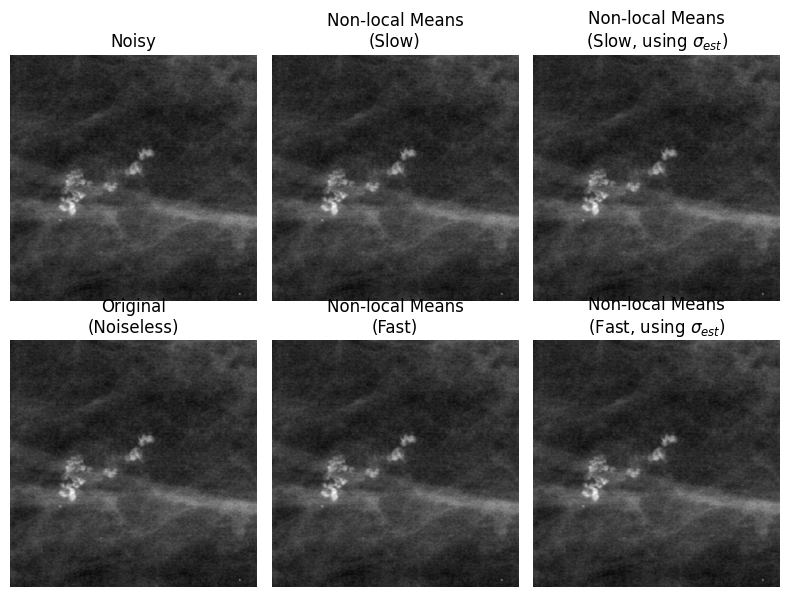

In [156]:
# Assuming 'image' is already loaded as a 2D grayscale image
f_img = img_as_float(image)  # Ensure the image is in float format

# Estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(f_img, channel_axis=None))  # channel_axis=None for 2D images
print(f'estimated noise standard deviation = {sigma_est}')

patch_kw = dict(
    patch_size=5, patch_distance=6  # 5x5 patches and 13x13 search area
)

# Apply non-local means denoising
denoise = denoise_nl_means(f_img, h=1.15 * sigma_est, fast_mode=False, **patch_kw)

# Apply non-local means denoising with sigma provided
denoise2 = denoise_nl_means(f_img, h=0.8 * sigma_est, sigma=sigma_est, fast_mode=False, **patch_kw)

# Apply fast non-local means denoising
denoise_fast = denoise_nl_means(f_img, h=0.8 * sigma_est, fast_mode=True, **patch_kw)

# Apply fast non-local means denoising with sigma provided
denoise2_fast = denoise_nl_means(f_img, h=0.6 * sigma_est, sigma=sigma_est, fast_mode=True, **patch_kw)

# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6), sharex=True, sharey=True)

ax[0, 0].imshow(f_img, cmap='gray')
ax[0, 0].axis('off')
ax[0, 0].set_title('Noisy')
ax[0, 1].imshow(denoise, cmap='gray')
ax[0, 1].axis('off')
ax[0, 1].set_title('Non-local Means\n(Slow)')
ax[0, 2].imshow(denoise2, cmap='gray')
ax[0, 2].axis('off')
ax[0, 2].set_title('Non-local Means\n(Slow, using $\\sigma_{est}$)')
ax[1, 0].imshow(f_img, cmap='gray')
ax[1, 0].axis('off')
ax[1, 0].set_title('Original\n(Noiseless)')
ax[1, 1].imshow(denoise_fast, cmap='gray')
ax[1, 1].axis('off')
ax[1, 1].set_title('Non-local Means\n(Fast)')
ax[1, 2].imshow(denoise2_fast, cmap='gray')
ax[1, 2].axis('off')
ax[1, 2].set_title('Non-local Means\n(Fast, using $\\sigma_{est}$)')

fig.tight_layout()

# Calculate and print PSNR values
psnr_noisy = peak_signal_noise_ratio(f_img, f_img)
psnr = peak_signal_noise_ratio(f_img, denoise)
psnr2 = peak_signal_noise_ratio(f_img, denoise2)
psnr_fast = peak_signal_noise_ratio(f_img, denoise_fast)
psnr2_fast = peak_signal_noise_ratio(f_img, denoise2_fast)

print(f'PSNR (Noisy) = {psnr_noisy:.2f}')
print(f'PSNR (Slow) = {psnr:.2f}')
print(f'PSNR (Slow, using sigma) = {psnr2:.2f}')
print(f'PSNR (Fast) = {psnr_fast:.2f}')
print(f'PSNR (Fast, using sigma) = {psnr2_fast:.2f}')

plt.show()

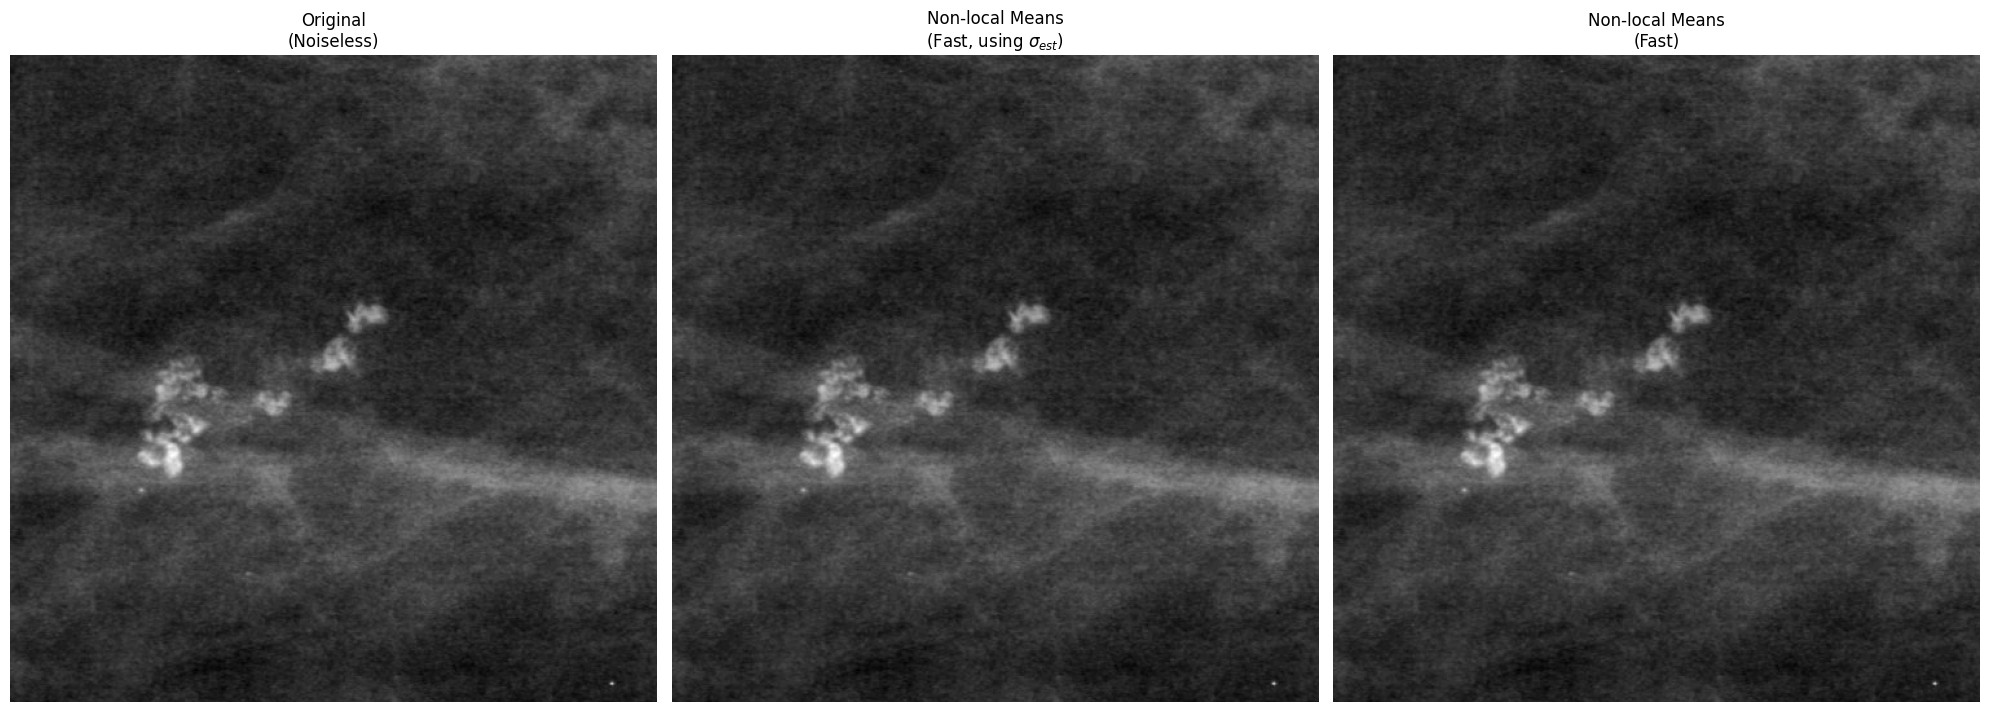

In [157]:
#plot big original image and denoised image fast2
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20), sharex=True, sharey=True)
ax[0].imshow(f_img, cmap='gray')
ax[0].axis('off')
ax[0].set_title('Original\n(Noiseless)')
ax[1].imshow(denoise2_fast, cmap='gray')
ax[1].axis('off')
ax[1].set_title('Non-local Means\n(Fast, using $\\sigma_{est}$)')
ax[2].imshow(denoise_fast, cmap='gray')
ax[2].axis('off')
ax[2].set_title('Non-local Means\n(Fast)')
fig.tight_layout()
plt.show()



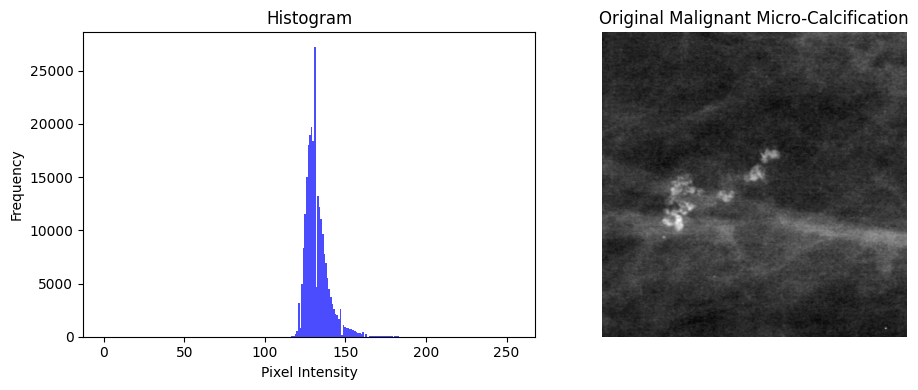

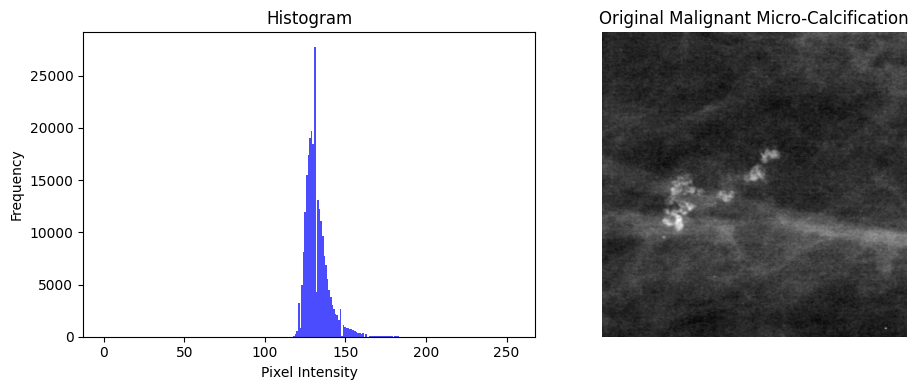

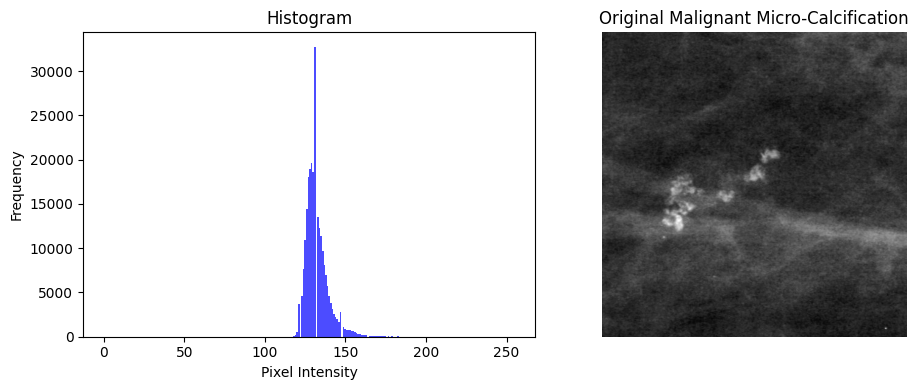

(None, None, None)

In [158]:
hist(denoise2_fast), hist(denoise_fast), hist(f_img)

In [159]:
denoise2_fast

array([[0.48667055, 0.48826258, 0.49023795, ..., 0.56078431, 0.56078431,
        0.55686275],
       [0.48649702, 0.49084984, 0.49653519, ..., 0.56084121, 0.56459372,
        0.56089648],
       [0.49034251, 0.49410705, 0.49802872, ..., 0.55294118, 0.55686275,
        0.56078431],
       ...,
       [0.48627451, 0.49019608, 0.49411765, ..., 0.49019608, 0.49022572,
        0.49022572],
       [0.47843137, 0.48235294, 0.48627451, ..., 0.49779666, 0.49365561,
        0.49099995],
       [0.49411765, 0.48627451, 0.48235294, ..., 0.48627451, 0.48627451,
        0.48627451]])

In [160]:
from PIL import Image

In [161]:
#convert the image to openCV
denoise2_fast_8 = np.uint8(denoise2_fast*255)


# create a CLAHE object (Arguments are optional).
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(denoise2_fast_8)

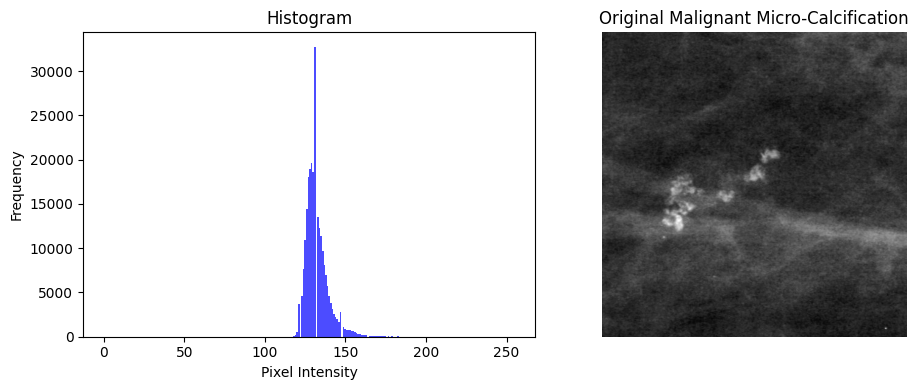

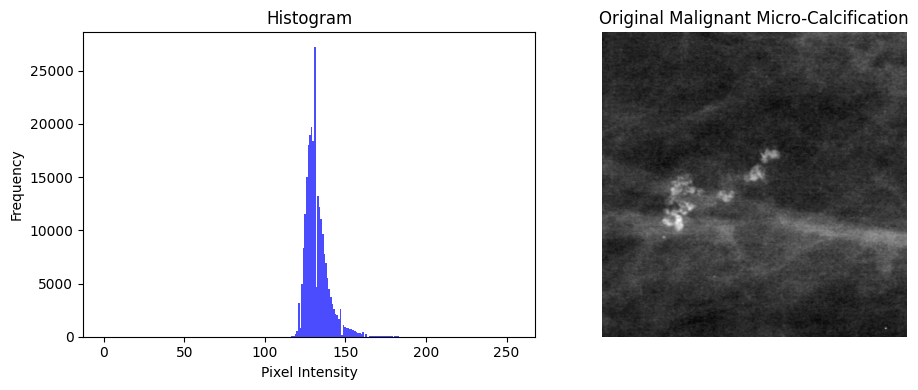

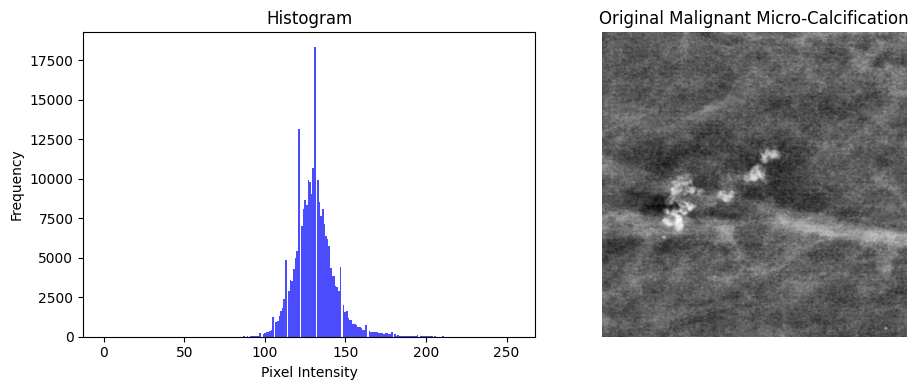

(None, None, None)

In [162]:
hist(image), hist(denoise2_fast), hist(cl1)

In [197]:
import torch
import torchvision.transforms.functional as F
from torchvision import transforms
from PIL import Image
import numpy as np

def nearest_fill_transform(image):
    # Apply transformations manually to ensure nearest fill
    # Step 1: Apply rotation with nearest neighbor interpolation
    image = F.rotate(image, angle=40)

    # Step 2: Apply translation (width and height shift)
    image = F.affine(image, angle=0, translate=(int(0.2 * image.size[0]), int(0.2 * image.size[1])), scale=1.0, shear=0)

    # Step 3: Apply shear with nearest neighbor interpolation
    image = F.affine(image, angle=0, translate=(0, 0), scale=1.0, shear=(20, 20))

    # Step 4: Apply zoom (RandomResizedCrop)
    i, j, h, w = transforms.RandomResizedCrop.get_params(image, scale=(0.8, 1.0), ratio=(1.0, 1.0))
    image = F.resized_crop(image, i, j, h, w, size=(224, 224), interpolation=Image.NEAREST)

    # Step 5: Apply horizontal flip
    if torch.rand(1) < 0.5:
        image = F.hflip(image)
    
    return image

# Define the augmentation pipeline
data_augmentation = transforms.Compose([
    transforms.Lambda(lambda img: nearest_fill_transform(img)),  # Apply custom nearest fill transformations
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize for single-channel grayscale
])

# Assuming cl1 is your single-channel grayscale image
augmented_image = data_augmentation(Image.fromarray(np.uint8(cl1)))

# Convert back to numpy if needed
augmented_image_np = augmented_image.squeeze().numpy()

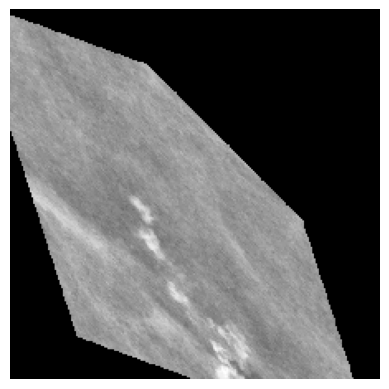

In [212]:
augmented_image = data_augmentation(Image.fromarray(np.uint8(cl1)))

plt.imshow(augmented_image.permute(1, 2, 0)*255, cmap='gray')
plt.axis('off')
plt.show()
